In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Other_Files/')

Mounted at /content/drive/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

#**Opening an Image**

To open an image, we are using the open() method from the PIL Image module. Similarly, we can use the matplotlib library to read and show images. It uses an image module for working with images. It offers two useful methods imread() and imshow()

*   imread() – to read the images
*   imshow() – to display the images

In this analysis, we are using imshow() method to display the image.

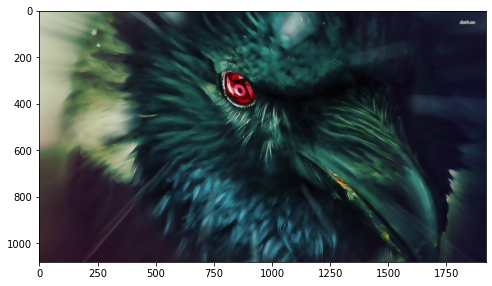

In [3]:
img = np.array(Image.open('Itachi Uchiha18.png'))
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

#**Opening an Image**

In this section, we will see what is the dimension, shape, and data type of an image. To check the size of the image, we are using the Image.size property. Check the below code:

In [4]:
print('# of dims: ',img.ndim)     # dimension of an image
print('Img shape: ',img.shape)    # shape of an image
print('Dtype: ',img.dtype)
print(img[20, 20])                # pixel value at [R, G, B]
print(img[:, :, 2].min())         # min pixel value at channel B

# of dims:  3
Img shape:  (1080, 1920, 3)
Dtype:  uint8
[202 206 183]
0


# **Saving ndarray as Image**

To save a ndarray as an image, we are using the Imag.save() method.

In [5]:
path = 'Itachi.png'
pil_img = Image.fromarray(img)
pil_img.save(path)

#**Rotating an Image**

We are rotating an image from scratch without using the PIL library. If you would like to rotate an image by using the PIL, then use Image.rotate() method.

Algorithm: image(ndarray) -> transpose -> mirror image across y axis (middle column)\
Check the below code to rotate an image by 90 degrees in a clockwise direction.

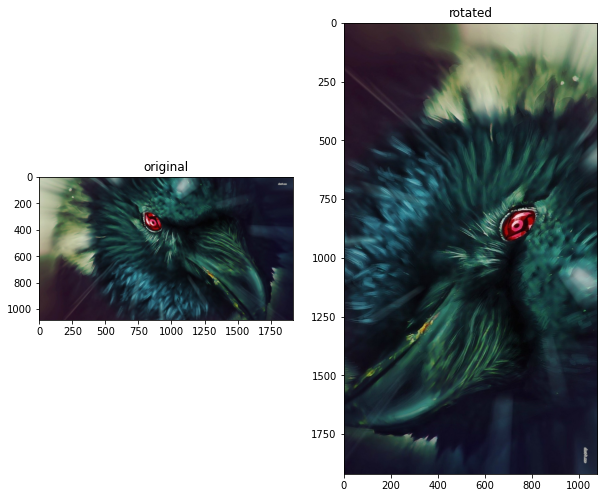

In [6]:
degrees = 90
img = np.array(Image.open('Itachi Uchiha18.png'))
# img = img.sum(2) / (255*3) # converting to grayscale
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("original")
img0 = img.copy()
for _ in range(degrees // 90):
    img0 = img0.transpose(1, 0, 2)
    for j in range(0, img0.shape[1] // 2):
        c = img0[:, j, :].copy()
        img0[:, j, :] = img0[: , img0.shape[1]-j-1, :]
        img0[: , img0.shape[1]-j-1, :] = c
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title("rotated")
plt.show()

Check the below code to rotate an image by 90 degrees in an anticlockwise direction.

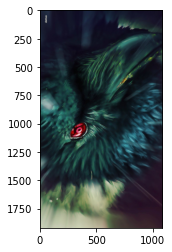

In [7]:
plt.imshow(np.rot90(img))
plt.show()

#**Negative of an Image**

Converting a color image to a negative image is very simple. You to perform only 3 steps for each pixel of the image   

*   First, get the RGB values of the pixel
*   Calculate new RGB values using R = 255 – R, G = 255 – G, B = 255- B
*   Finally, save the new RGB values in the pixel

Check the below code to convert an image to a negative image.

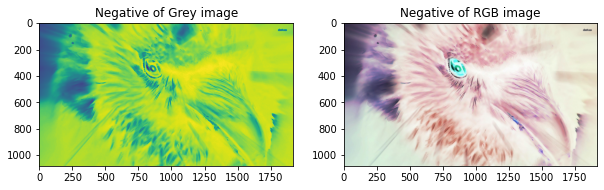

In [8]:
fig = plt.figure(figsize=(10, 10))
img_grey = img.sum(2) / (255*3)
img_grey = 255*3 - img_grey        # 255 * 3 because we added along channel axis previously
fig.add_subplot(1, 2, 1)
plt.imshow(img_grey)
plt.title('Negative of Grey image')
img = 255 - img
fig.add_subplot(1, 2, 2)
plt.imshow(img)
plt.title('Negative of RGB image')
plt.show()

#**Padding Black Spaces**

To add black padding around an image, use the below code:

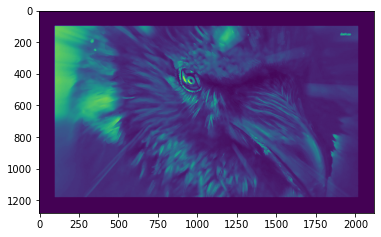

In [9]:
img = np.array(Image.open('Itachi Uchiha18.png'))
img_grey = img.sum(2) / (255*3)
img0 = img_grey.copy()
img0 = np.pad(img0, ((100,100),(100,100)), mode='constant')
plt.imshow(img0)
plt.show()

#**Visualizing RGB Channels**

To split the image into each RGB colors, you can use the below code:

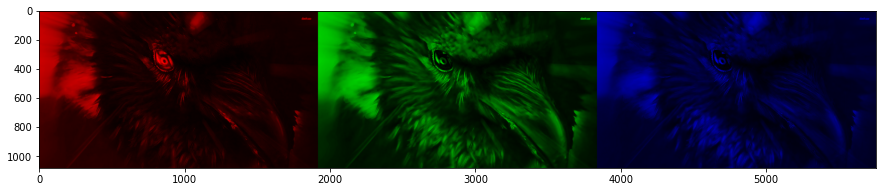

In [10]:
img = np.array(Image.open('Itachi Uchiha18.png'))
img_R, img_G, img_B = img.copy(), img.copy(), img.copy()
img_R[:, :, (1, 2)] = 0
img_G[:, :, (0, 2)] = 0
img_B[:, :, (0, 1)] = 0
img_rgb = np.concatenate((img_R,img_G,img_B), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)
plt.show()

#**Colour Reduction**

We can reduce the color intensity depends on our needs. Check the below code for color reduction.

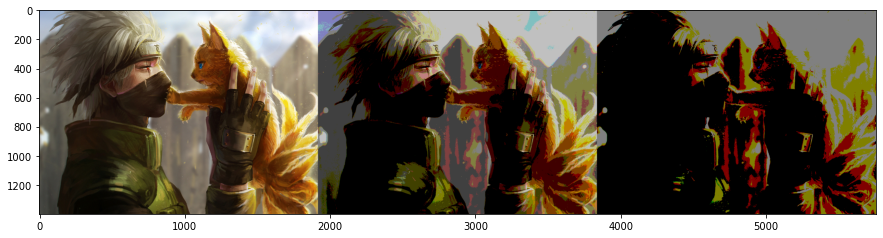

In [11]:
img = np.array(Image.open('Kakashi_Hatake.png'))
# Making Pixel values discrete by first division by // which gives int and then multiply by the same factor
img_0 = (img // 64) * 64
img_1 = (img // 128) * 128
img_all = np.concatenate((img, img_0, img_1), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_all)
plt.show()

# **Trim Image**

We can trim an image in Numpy using Array Slicing. Check the below code for trimming an image using python.

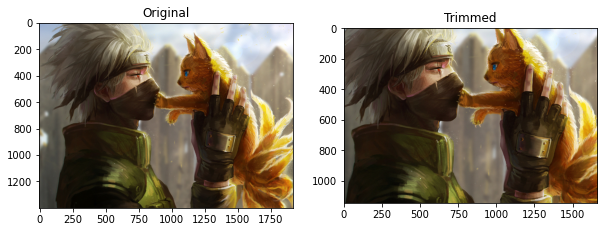

In [12]:
img = np.array(Image.open('Kakashi_Hatake.png'))
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
img0 = img[128:-128, 128:-128, :]
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title('Trimmed')
plt.show()

# **Pasting With Slice**

We can paste a slice of an image onto another image. Check the below code in Python for pasting a slice of the image.

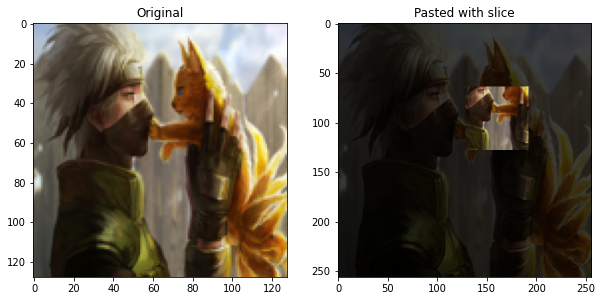

In [13]:
src = np.array(Image.open('Kakashi_Hatake.png').resize((128, 128)))
dst = np.array(Image.open('Kakashi_Hatake.png').resize((256, 256))) // 4
dst_copy = dst.copy()
dst_copy[64:128, 128:192] = src[32:96, 32:96]
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(src)
plt.title('Original')
fig.add_subplot(1, 2, 2)
plt.imshow(dst_copy)
plt.title('Pasted with slice')
plt.show()

# **Binarize Image**

We can also binarize an Image using Numpy. Check the below code to binarize an image.

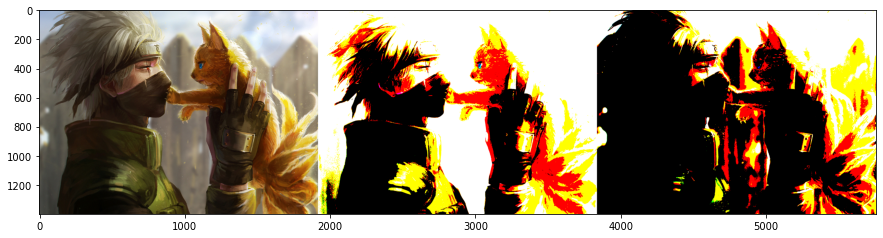

In [14]:
img = np.array(Image.open('Kakashi_Hatake.png'))
img_64 = (img > 64) * 255
img_128 = (img > 128) * 255
fig = plt.figure(figsize=(15, 15))
img_all = np.concatenate((img, img_64, img_128), axis=1)
plt.imshow(img_all)
plt.show()

# **Flip Image**

Check the below code for flipping an image.

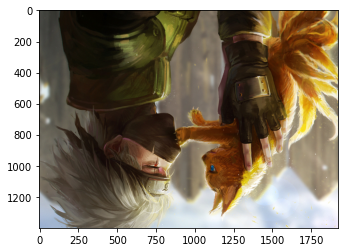

In [15]:
img0 = img.copy()
for i in range(img0.shape[0] // 2):
    c = img0[i, :, :].copy()
    img0[i, :, :] = img0[img0.shape[0] - i - 1, :, :]
    img0[img0.shape[0] - i - 1, :, :] = c
plt.imshow(img0)
plt.show()

# **An Alternate way to Flip an Image**


*    np.flipud() : [up/down]flips over x-axis
*    np.fliplr() : [left/right]flips over y_axis

Check the below code for Flipping an Image:

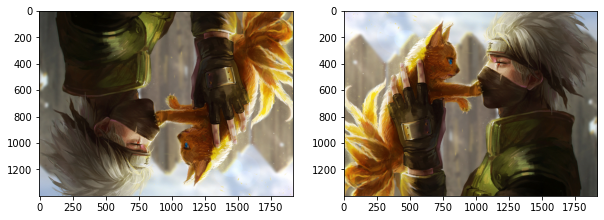

In [16]:
img = np.array(Image.open('Kakashi_Hatake.png'))
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(np.flipud(img))
fig.add_subplot(1, 2, 2)
plt.imshow(np.fliplr(img))
plt.show()

# **Blending Two Images**


If you want to blend two images, then you can do that too. Check the below code.

uint8


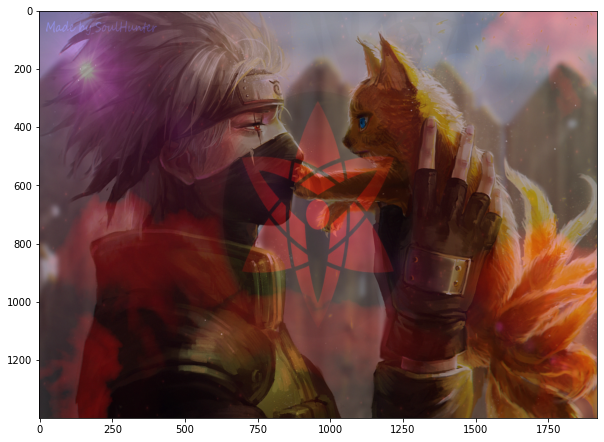

In [17]:
img = np.array(Image.open('Kakashi_Hatake.png'))
img0 = np.array(Image.open('Eye.jpg').resize(img.shape[1::-1])) # resize takes 2 arguments (WIDTH, HEIGHT)
print(img.dtype)
# uint8
dst = (img * 0.6 + img0 * 0.4).astype(np.uint8)   # Blending them in
plt.figure(figsize=(10, 10))
plt.imshow(dst)
plt.show()

# **Masking Images**

Check the below code for masking an image.

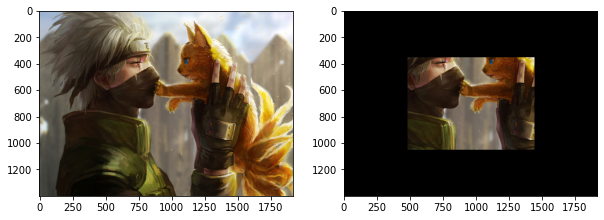

In [18]:
img = np.array(Image.open('Kakashi_Hatake.png'))
ones = np.ones((img.shape[0] // 2, img.shape[1] // 2, 3))
zeros = np.zeros(((img.shape[0] // 4, img.shape[1] // 4, 3)))
zeros_mid = np.zeros(((img.shape[0] // 2, img.shape[1] // 4, 3)))
up = np.concatenate((zeros, zeros, zeros, zeros), axis=1)
middle = np.concatenate((zeros_mid, ones, zeros_mid), axis=1)
down = np.concatenate((zeros, zeros, zeros, zeros), axis=1)
mask = np.concatenate((up, middle, down), axis=0)
mask = mask / 255
img0 = mask * img
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.show()

# **Histogram For Pixel Intensity**

Let’s draw the histogram using a matplotlib hist() function. Check the below code to draw the Pixel Intensity Histogram.

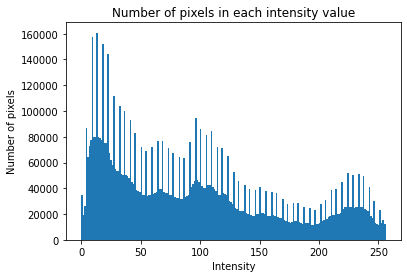

In [19]:
img = np.array(Image.open('Kakashi_Hatake.png'))
img_flat = img.flatten()
plt.hist(img_flat, bins=200, range=[0, 256])
plt.title("Number of pixels in each intensity value")
plt.xlabel("Intensity")
plt.ylabel("Number of pixels")
plt.show()